# Task 2: <font color="#338CFF">Unemployment Analysis With Python</font>

---

## Author: <font color="#b30000">Rajesh Patil</font>

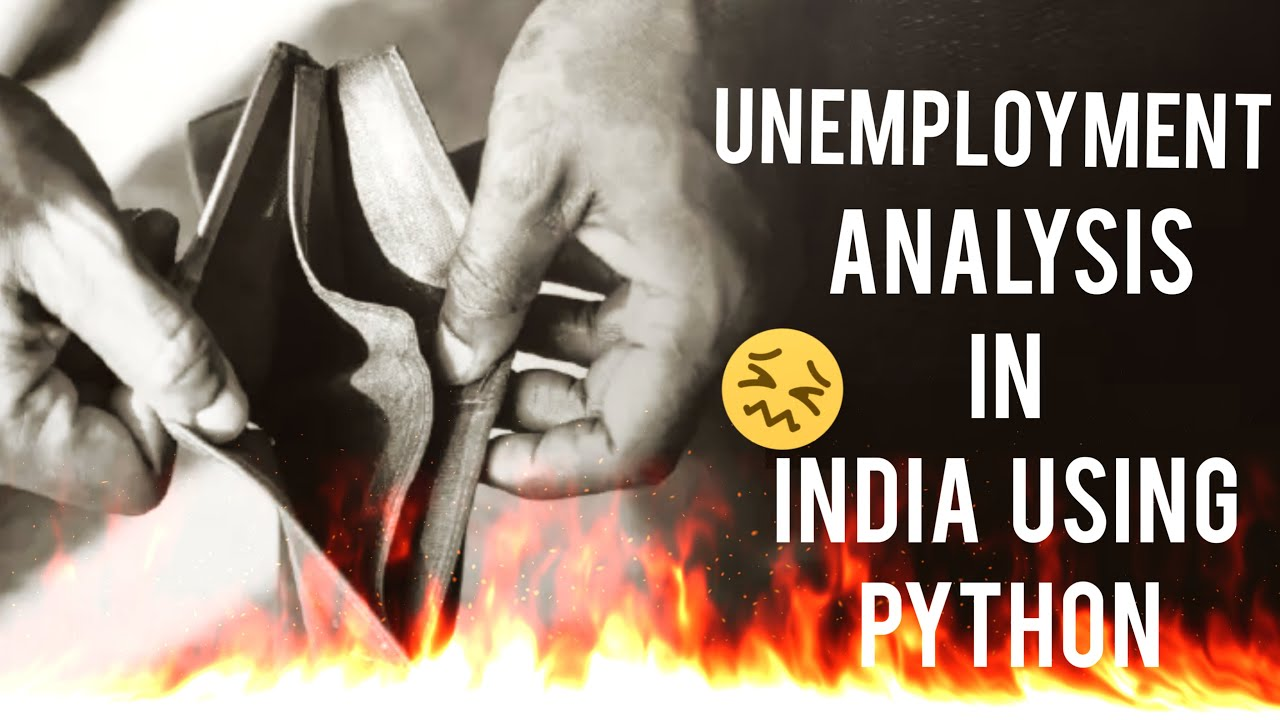

## <font color="#b30000">Import Libraries</font>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## <font color="#b30000">Load and Explore the Dataset</font>

In [2]:
df = pd.read_csv("Unemployment in India.csv")

In [3]:
df.shape

(768, 7)

In [4]:
df.head()

Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df.describe()

Estimated Unemployment Rate (%)   Estimated Employed  \
count                        740.000000         7.400000e+02   
mean                          11.787946         7.204460e+06   
std                           10.721298         8.087988e+06   
min                            0.000000         4.942000e+04   
25%                            4.657500         1.190404e+06   
50%                            8.350000         4.744178e+06   
75%                           15.887500         1.127549e+07   
max                           76.740000         4.577751e+07   

        Estimated Labour Participation Rate (%)  
count                                740.000000  
mean                                  42.630122  
std                                    8.111094  
min                                   13.330000  
25%                                   38.062500  
50%                                   41.160000  
75%                                   45.505000  
max                                   72.570000

In [7]:
# Check for duplicates
duplicates = df.duplicated()
if duplicates.sum() > 0:
    print(f"\033[1mWarning:\033[0m {duplicates.sum()} duplicate rows found. Removing duplicates.")
    df = df.drop_duplicates()

In [8]:
# Check for missing values
pd.isnull(df).sum()

Region                                      1
 Date                                       1
 Frequency                                  1
 Estimated Unemployment Rate (%)            1
 Estimated Employed                         1
 Estimated Labour Participation Rate (%)    1
Area                                        1
dtype: int64

In [9]:
missing_values = df.isnull().sum()
if missing_values.sum() > 0:
    print("\033[1mWarning:\033[0m Missing values found. Handling missing values.")
    df = df.dropna()

In [10]:
pd.isnull(df).sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [11]:
df.shape

(740, 7)

## <font color="#b30000">Data Preprocessing</font>

In [12]:
# Updating Column Names

df.columns = df.columns.str.strip()  # Remove leading and trailing whitespaces from column names

df.rename(columns={
    'Region': 'State',
    'Date': 'Date',
    'Frequency': 'Frequency',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labor_Participation_Rate',
    'Area': 'Area',
}, inplace=True)

print(df.columns)

Index(['State', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labor_Participation_Rate', 'Area'],
      dtype='object')


In [13]:
df.head()

State         Date Frequency  Unemployment_Rate    Employed  \
0  Andhra Pradesh   31-05-2019   Monthly               3.65  11999139.0   
1  Andhra Pradesh   30-06-2019   Monthly               3.05  11755881.0   
2  Andhra Pradesh   31-07-2019   Monthly               3.75  12086707.0   
3  Andhra Pradesh   31-08-2019   Monthly               3.32  12285693.0   
4  Andhra Pradesh   30-09-2019   Monthly               5.17  12256762.0   

   Labor_Participation_Rate   Area  
0                     43.24  Rural  
1                     42.05  Rural  
2                     43.50  Rural  
3                     43.97  Rural  
4                     44.68  Rural

In [14]:
df.State.value_counts()

State
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

In [15]:
len(pd.unique(df['State']))

28

In [16]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Converting 'Date' column to datetime

# Creating a new column for the month
df['Month'] = df['Date'].dt.month

print(df.head())

            State       Date Frequency  Unemployment_Rate    Employed  \
0  Andhra Pradesh 2019-05-31   Monthly               3.65  11999139.0   
1  Andhra Pradesh 2019-06-30   Monthly               3.05  11755881.0   
2  Andhra Pradesh 2019-07-31   Monthly               3.75  12086707.0   
3  Andhra Pradesh 2019-08-31   Monthly               3.32  12285693.0   
4  Andhra Pradesh 2019-09-30   Monthly               5.17  12256762.0   

   Labor_Participation_Rate   Area  Month  
0                     43.24  Rural      5  
1                     42.05  Rural      6  
2                     43.50  Rural      7  
3                     43.97  Rural      8  
4                     44.68  Rural      9  


## <font color="#b30000">Visualize the Data during EDA</font>

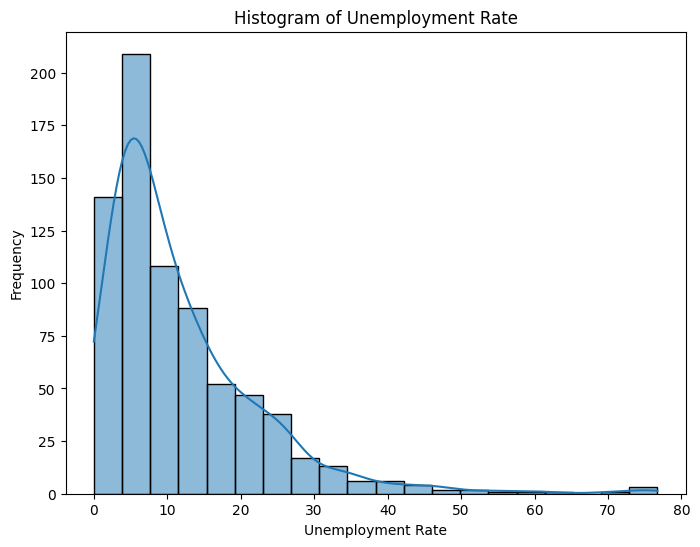

In [17]:
# Histogram of the Unemployment Rate
plt.figure(figsize=(8, 6))
sns.histplot(df['Unemployment_Rate'], bins=20, kde=True)
plt.title('Histogram of Unemployment Rate')
plt.xlabel('Unemployment Rate')
plt.ylabel('Frequency')
plt.show()

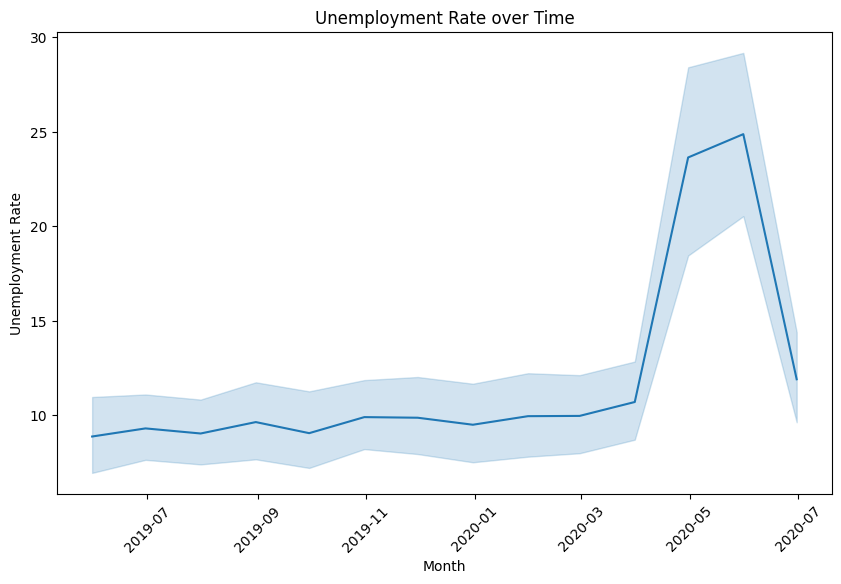

In [18]:
# Line plot of Unemployment Rate over time (Date)
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Unemployment_Rate', data=df)
plt.title('Unemployment Rate over Time')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

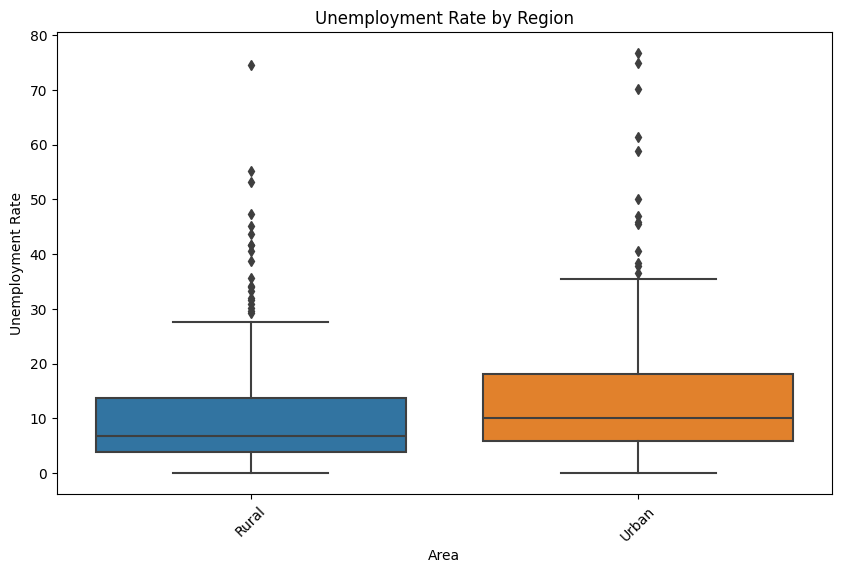

In [19]:
# Box plot of Unemployment Rate by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area', y='Unemployment_Rate', data=df)
plt.title('Unemployment Rate by Region')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

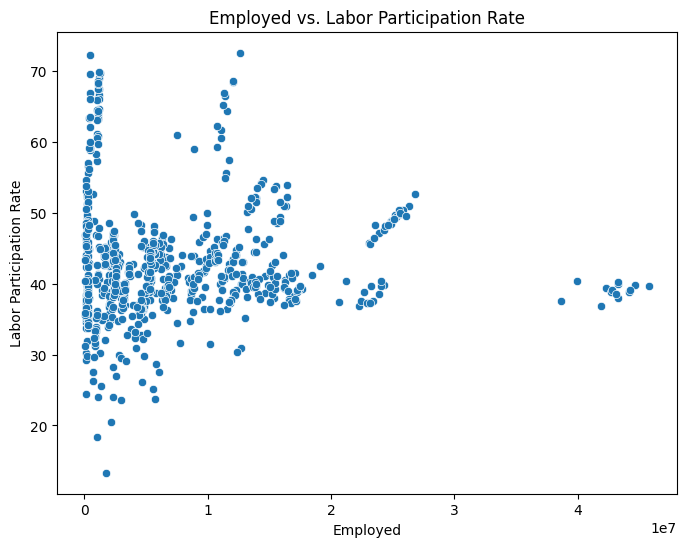

In [20]:
# Scatter plot of Employed vs. Labor Participation Rate
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Employed', y='Labor_Participation_Rate', data=df)
plt.title('Employed vs. Labor Participation Rate')
plt.xlabel('Employed')
plt.ylabel('Labor Participation Rate')
plt.show()

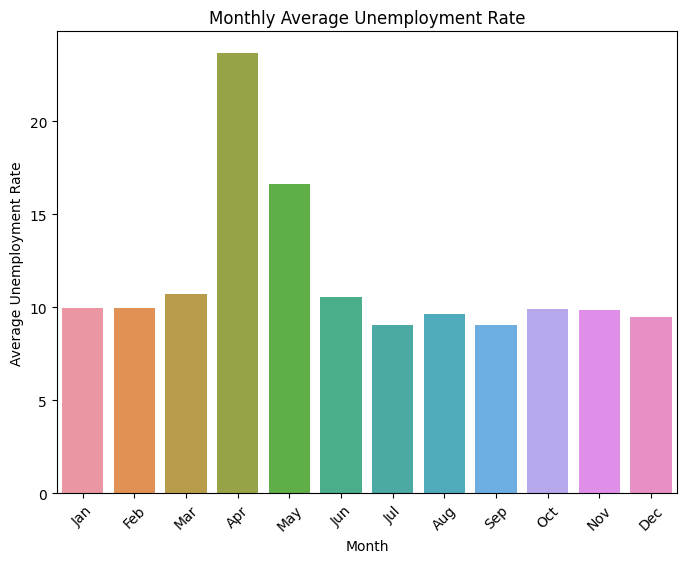

In [21]:
monthly_avg_unemployment = df.groupby('Month')['Unemployment_Rate'].mean()

# Plotting the monthly average of Unemployment Rate
plt.figure(figsize=(8, 6))
sns.barplot(x=monthly_avg_unemployment.index, y=monthly_avg_unemployment.values)
plt.title('Monthly Average Unemployment Rate')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate')
plt.xticks(np.arange(0, 12), calendar.month_abbr[1:13], rotation=45)
plt.show()

In [22]:
df1 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [23]:
# Updating Column Names

df1.columns = df1.columns.str.strip()  # Remove leading and trailing whitespaces from column names

df1.rename(columns={
    'Region': 'State',
    'Date': 'Date',
    'Frequency': 'Frequency',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labor_Participation_Rate',
    'Region.1': 'Region',
    'longitude': 'Longitude',
    'latitude': 'Latitude'
}, inplace=True)

print(df1.columns)

Index(['State', 'Date', 'Frequency', 'Unemployment_Rate', 'Employed',
       'Labor_Participation_Rate', 'Region', 'Longitude', 'Latitude'],
      dtype='object')


In [24]:
df1['Date'] = pd.to_datetime(df1['Date'], dayfirst=True)  # Converting 'Date' column to datetime

# Creating a new column for the month
df1['Month'] = df1['Date'].dt.month

print(df1.head())

            State       Date Frequency  Unemployment_Rate  Employed  \
0  Andhra Pradesh 2020-01-31         M               5.48  16635535   
1  Andhra Pradesh 2020-02-29         M               5.83  16545652   
2  Andhra Pradesh 2020-03-31         M               5.79  15881197   
3  Andhra Pradesh 2020-04-30         M              20.51  11336911   
4  Andhra Pradesh 2020-05-31         M              17.43  12988845   

   Labor_Participation_Rate Region  Longitude  Latitude  Month  
0                     41.02  South    15.9129     79.74      1  
1                     40.90  South    15.9129     79.74      2  
2                     39.18  South    15.9129     79.74      3  
3                     33.10  South    15.9129     79.74      4  
4                     36.46  South    15.9129     79.74      5  


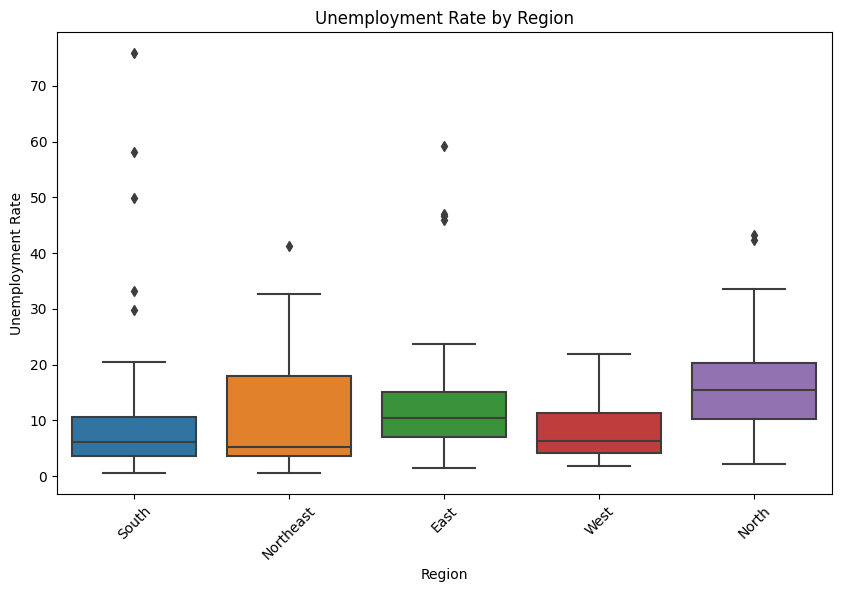

In [25]:
# Box plot of Unemployment Rate by Region
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Unemployment_Rate', data=df1)
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

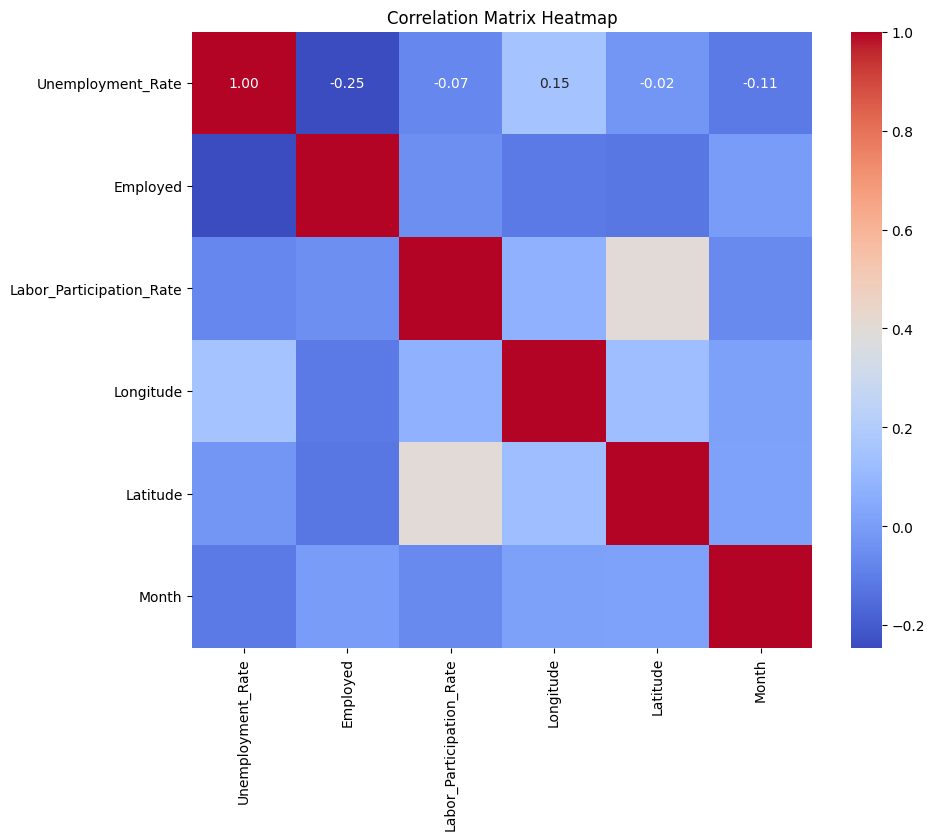

In [26]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = df1.select_dtypes(include=[np.number])

# Calculate correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

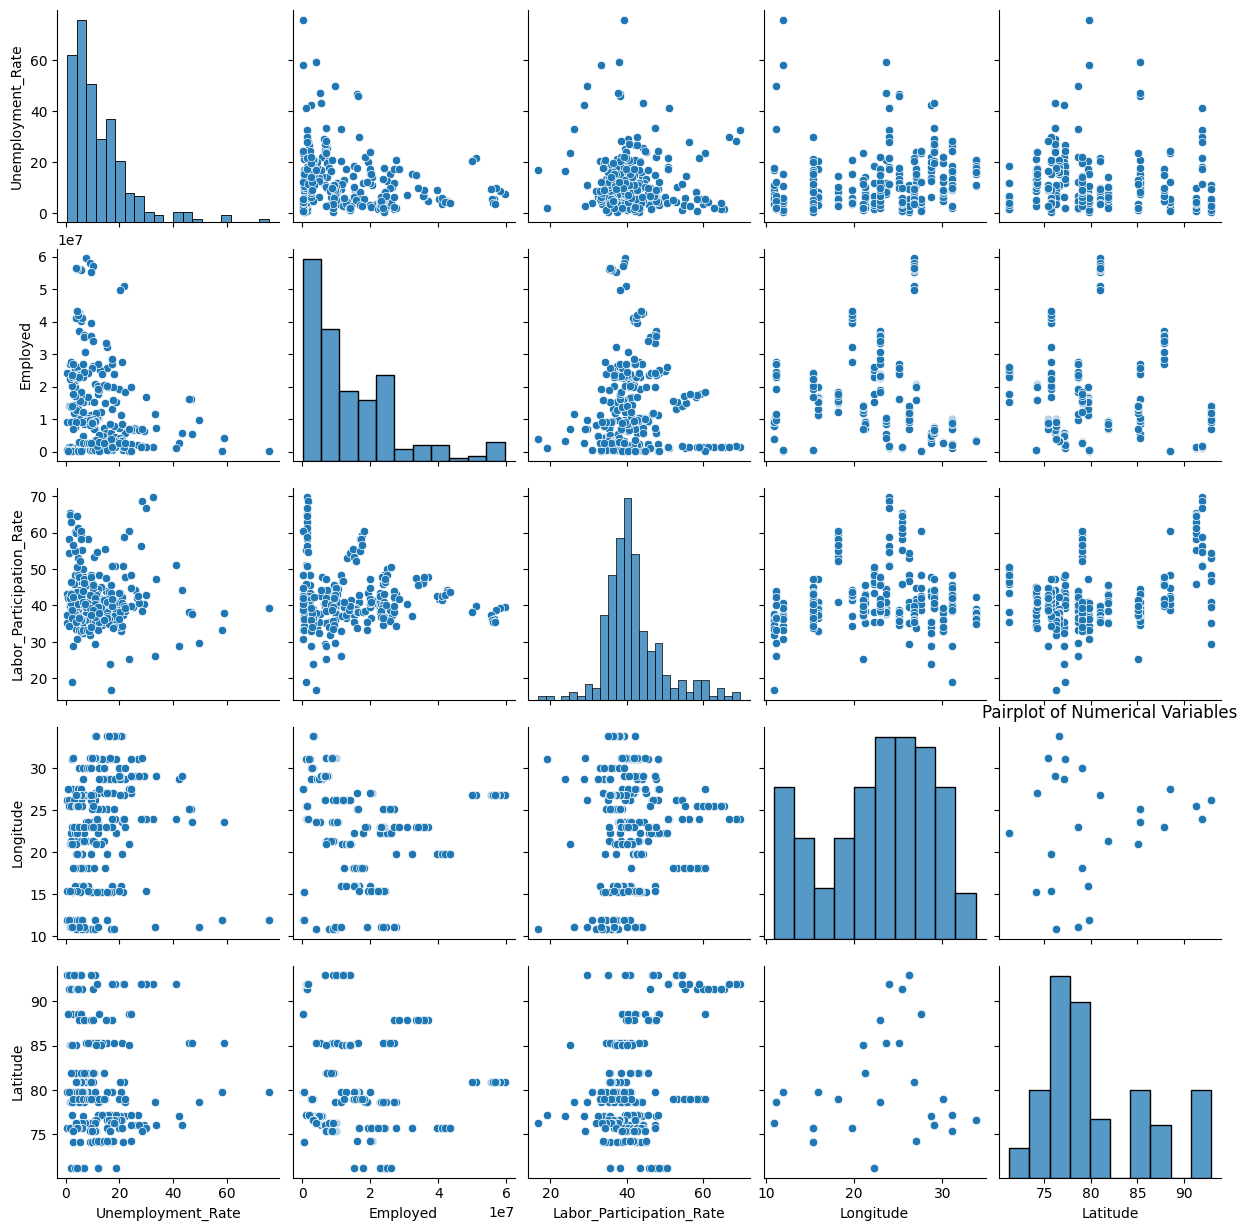

In [27]:
numerical_columns = ['Unemployment_Rate', 'Employed', 'Labor_Participation_Rate', 'Longitude', 'Latitude']
sns.pairplot(df1[numerical_columns])
plt.title('Pairplot of Numerical Variables')
plt.show()

In [28]:
fig = px.scatter_geo(df1, 
                     lat='Longitude', lon='Latitude', color="State",
                     hover_name="State", size="Unemployment_Rate",
                     animation_frame="Month", scope='asia',
                     title='Impact of Lockdown (During Covid-19) on Employment in India',
                     projection='natural earth',
                     color_continuous_scale='viridis',
                     size_max=30)
fig.update_geos(
    showcoastlines=True, coastlinecolor="RebeccaPurple", coastlinewidth=1,
    showland=True, landcolor="LightGreen", 
    showocean=True, oceancolor="LightBlue", 
    showcountries=True, countrycolor="Black", countrywidth=1, 
    showlakes=True, lakecolor="LightBlue"
)

# Setting center around India and increase the scale for closer view
fig.update_geos(center=dict(lon=78, lat=23), projection_scale=4)

fig.show()

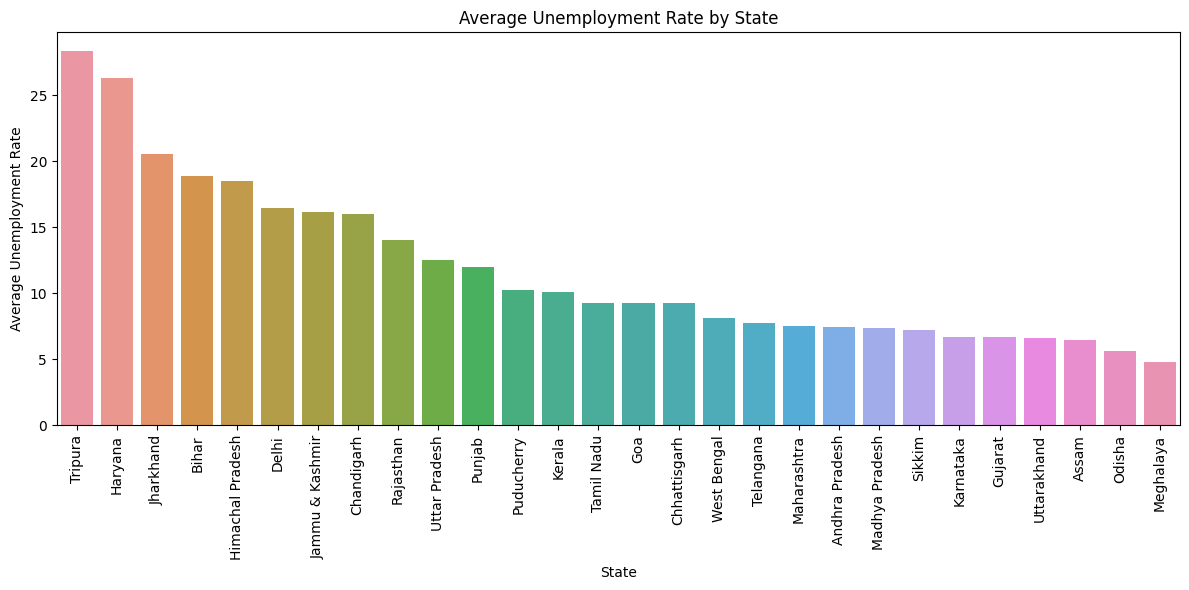

In [29]:
state_unemployment = df.groupby('State')['Unemployment_Rate'].mean().reset_index()

# Sort the data in descending order to find the state with the highest unemployment rate
state_unemployment_sorted = state_unemployment.sort_values(by='Unemployment_Rate', ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Unemployment_Rate', data=state_unemployment_sorted)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by State')
plt.tight_layout()
plt.show()

## <font color="#b30000">Conclusion -</font>
### <font color="#338CFF">Based on the EDA and the visualizations of the unemployment rate data, we can draw the following conclusions:</font>
### Urban Areas:
The analysis indicates that most of the high unemployment rates are observed in urban areas. This could be attributed to various factors such as a higher population density, more industries, and a larger labor force competing for limited job opportunities.

### Regional Variation:
The north and northeast region of India shows a higher average unemployment rate compared to other regions. This regional disparity may be influenced by economic and industrial variations across different parts of the country.

### States with Highest Unemployment Rates:
The top five states with the highest average unemployment rates are Tripura, Haryana, Jharkhand, Bihar, and Himachal Pradesh. These states might be facing specific economic challenges and job market issues, contributing to elevated unemployment rates.

### <font color="#338CFF">Thank You.</font>